## 关联 （Correlation）

### 边缘直方图 （Marginal Histogram）

边缘直方图具有沿 X 和 Y 轴变量的直方图。 这用于可视化 X 和 Y 之间的关系以及单独的 X 和 Y 的单变量分布。 这种图经常用于探索性数据分析（EDA）。

### 导入所需要的库

In [1]:
# 导入numpy库
import numpy as np
# 导入pandas库
import pandas as pd
# 导入matplotlib库
import matplotlib as mpl
import matplotlib.pyplot as plt
# 导入seaborn库
import seaborn as sns
# 在jupyter notebook显示图像
%matplotlib inline

### 设定图像各种属性

In [3]:
large = 22; med = 16; small = 12
            # 设置子图上的标题字体
params = {'axes.titlesize': large,  
            # 设置图例的字体
          'legend.fontsize': med,
            # 设置图像的画布
          'figure.figsize': (16, 10),  
            # 设置标签的字体
          'axes.labelsize': med, 
            # 设置x轴上的标尺的字体
          'xtick.labelsize': med,  
            # 设置整个画布的标题字体
          'ytick.labelsize': med,  
          'figure.titlesize': large}  
# 更新默认属性
plt.rcParams.update(params)  
 # 设定整体风格
plt.style.use('seaborn-whitegrid')
# 设定整体背景风格
sns.set_style("white")  

### 测试版本

In [4]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

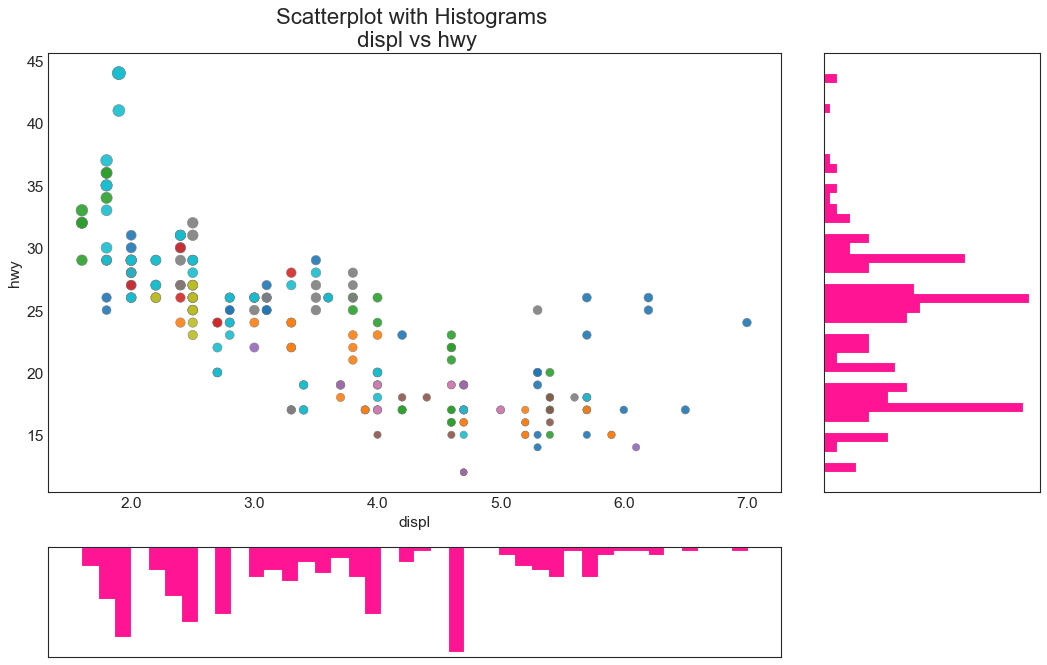

In [16]:
# step1:导入数据
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# step2:创建子图对象与网格
    # 画布
                
fig = plt.figure(figsize = (16, 10),     # 画布大小_(16, 10)
                 dpi = 80,               # 分辨率
                 facecolor = 'white')    # 背景颜色，默认为白色
    # 网格
                    
grid = plt.GridSpec(4,                   # 行数 
                    4,                   # 列数
                    hspace = 0.5,        # 行与行之间的间隔
                    wspace = 0.2)        # 列与列之间的间隔

# step3:明确子图的位置
    # 确定如图所示散点图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
    # 确定如图所示右边直方图的位置
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
    # 确定如图所示最底下直方图的位置
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

# step4：散点图
    # category__Category是pandas的一种数据类型
    # astype__实现变量类型转换
    # cat__获取分类变量的类别
    # codes__按照类别编码
ax_main.scatter('displ',             # 横坐标
               'hwy',                # 纵坐标
                s = df.cty*4,        # 设置点的尺寸
               data = df,            # 所使用的数据
               c = df.manufacturer.astype('category').cat.codes,   # 颜色类别
                cmap = 'tab10',      # 调色板
                edgecolors = 'gray', # 边框颜色
                linewidths = 0.5,    # 线宽
                alpha = 0.9)          # 透明度
               
# step5:右边的直方图
ax_right.hist(df.hwy,                 # 需要绘图的变量
             40,                      # 需要分为多少段
             histtype = 'stepfilled', # 生成一个的线条轮廓
             orientation = 'horizontal',  # 方位__水平
             color = 'deeppink')      # 颜色__深粉色


# step6:底部的直方图
ax_bottom.hist(df.displ,                # 需要绘图的变量
              40,                       # 需要分为多少段
              histtype = 'stepfilled',  # 生成一个的线条轮廓
              orientation = 'vertical', # 方位__垂直
              color = 'deeppink')       # 颜色__深粉色
ax_bottom.invert_yaxis()

# step7:装饰图像
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',  # 设置标题
            xlabel='displ',             # 横坐标名称
            ylabel='hwy')               # 纵坐标名称
ax_main.title.set_fontsize(20)          # 设置标题字体大小
    # xaxis.label__x坐标轴的标题
    # yaxis.label__y坐标轴的标题
    # xticklabel__x坐标轴的标尺
    # yticklabel__y坐标轴的标尺
        # 遍历每一个对象并且修改其字体大小
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)               # 修改字体大小

xlabels = ax_main.get_xticks().tolist() # 将散点图上的x坐标轴上的标尺提取后转换为list(一位小数)
ax_main.set_xticklabels(xlabels)        # 将xlabels中的数字设置为散点图上的坐标轴上的标尺
plt.show()                              # 显示图像